<a href="https://colab.research.google.com/github/Al13exxx/parsing_linear-regression/blob/main/Phones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import re

In [ ]:
%%shell
pip install -U pip
pip install -U setuptools wheel

Install the proper version of PyTorch following https://pytorch.org/get-started/locally/
pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 --index-url https://download.pytorch.org/whl/cu118

pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
/bin/bash: line 4: Install: command not found
Looking in indexes: h

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
df=df.loc[:, 'Производитель':'Цена']
df=df.drop_duplicates()
df=df.drop('IMEI',axis=1)

In [ ]:
df=df.dropna()
df.dtypes
df['Модель'].values
df=df.drop('Производитель',axis=1)

In [ ]:
df['Цена'] = df['Цена'].apply(lambda x: str(x).replace(' ', '')).str.replace(r"[^\d\.]", "", regex=True)
df['Цена'] = df['Цена'].apply(lambda x: float(x) if x else None)

In [ ]:
df['Оперативная память'] = df['Оперативная память'].astype('str').str.extract("([-+]?\d*\.\d+|[-+]?\d*\\d+)").astype(float)
df['Оперативная память'] = df['Оперативная память'].fillna(0).astype(np.int64, errors='ignore')
df['Встроенная память'] = df['Встроенная память'].astype('str').str.extract("([-+]?\d*\.\d+|[-+]?\d*\\d+)").astype(float)
df['Встроенная память'] = df['Встроенная память'].fillna(0).astype(np.int64, errors='ignore')
df['Цена'] = df['Цена'].fillna(0).astype(np.int64, errors='ignore')



In [ ]:
new=pd.read_csv('/content/now (4).csv')
new

,Модель,Скорость процессора,Ёмкость батареи,Кол-во камер,Передняя камера,Задняя камера
0,Note 13 Pro,2.90,4400.0,4.0,32.0,108.0
1,Y5 (2019),1.30,2600.0,4.0,5.0,13.0
2,Redmi Note 10 Pro,2.05,5020.0,5.0,16.0,108.0
3,Galaxy S22,3.00,4500.0,4.0,40.0,50.0
4,9 Pro+,2.90,4000.0,4.0,8.0,12.0
...,...,...,...,...,...,...
1126,Xiaomi Redmi Note 9 Pro,2.30,5020.0,4.0,48.0,16.0
1127,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),2.30,5020.0,4.0,48.0,16.0
1128,Xiaomi Redmi Note 9 Pro Max,2.30,5020.0,4.0,64.0,32.0
1129,ZTE Axon 30S,3.20,4200.0,4.0,50.0,16.0


In [ ]:
#new.columns = ['Модель','Скорость процессора','Ёмкость батареи','Кол-во камер','Передняя камера','Задняя камера']
new.dtypes

Модель                  object
Скорость процессора    float64
Ёмкость батареи        float64
Кол-во камер           float64
Передняя камера        float64
Задняя камера          float64
dtype: object

In [ ]:
new['Ёмкость батареи'] = new['Ёмкость батареи'].fillna(0).astype(np.int64, errors='ignore')
new['Передняя камера'] = new['Передняя камера'].fillna(0).astype(np.int64, errors='ignore')
new['Задняя камера'] = new['Задняя камера'].fillna(0).astype(np.int64, errors='ignore')
new['Кол-во камер'] = new['Кол-во камер'].fillna(0).astype(np.int64, errors='ignore')
new.dtypes

Модель                  object
Скорость процессора    float64
Ёмкость батареи          int64
Кол-во камер             int64
Передняя камера          int64
Задняя камера            int64
dtype: object

In [ ]:
train_data = pd.merge(df,new,on='Модель',how='inner')
#train_data=train_data.dropna()
# train_data=train_data.drop_duplicates()
train_data=train_data.drop('Цвет',axis=1)
train_data

,Модель,Встроенная память,Оперативная память,Цена,Скорость процессора,Ёмкость батареи,Кол-во камер,Передняя камера,Задняя камера
0,Note 13 Pro,256,8,11000,2.90,4400,4,32,108
1,Y5 (2019),16,2,2000,1.30,2600,4,5,13
2,Galaxy A03 Core,32,2,5990,1.50,3000,2,8,5
3,Galaxy A03 Core,32,2,4990,1.50,3000,2,8,5
4,Galaxy A03 Core,32,2,4990,1.50,3000,2,8,5
...,...,...,...,...,...,...,...,...,...
496,Galaxy A01 Core,16,1,2490,1.30,3000,2,2,13
497,Redmi 6 Pro,32,3,5499,2.00,4000,3,8,12
498,Galaxy Note 20,256,8,28000,2.73,4300,3,10,64
499,Galaxy J3 (2016) SM-J320F/DS,8,1,2900,1.30,2600,2,5,8


In [ ]:
ooo={'Модель':'Note 13 Pro',	'Встроенная память':256,	'Оперативная память':8,	'Цена':11000,	'Скорость процессора':2.9,'Ёмкость батареи': '5100', 'Кол-во камер':3	,'Передняя камера': 8,'Задняя камера':200}
train_data.loc[0]=ooo
train_data

,Модель,Встроенная память,Оперативная память,Цена,Скорость процессора,Ёмкость батареи,Кол-во камер,Передняя камера,Задняя камера
0,Note 13 Pro,256,8,11000,2.90,5100,3,8.0,200
1,Y5 (2019),16,2,2000,1.30,2600,4,5.0,13
2,Galaxy A03 Core,32,2,5990,1.50,3000,2,8.0,5
3,Galaxy A03 Core,32,2,4990,1.50,3000,2,8.0,5
4,Galaxy A03 Core,32,2,4990,1.50,3000,2,8.0,5
...,...,...,...,...,...,...,...,...,...
496,Galaxy A01 Core,16,1,2490,1.30,3000,2,2.0,13
497,Redmi 6 Pro,32,3,5499,2.00,4000,3,8.0,12
498,Galaxy Note 20,256,8,28000,2.73,4300,3,10.0,64
499,Galaxy J3 (2016) SM-J320F/DS,8,1,2900,1.30,2600,2,5.0,8


In [ ]:
label = 'Цена'

In [ ]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path,eval_metric='mean_absolute_error').fit(train_data)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.57 GB / 12.67 GB (83.4%)
Disk Space Avail:   74.15

[1000]	valid_set's l1: 4572.81
[2000]	valid_set's l1: 4411.21
[3000]	valid_set's l1: 4329.36
[4000]	valid_set's l1: 4286.57
[5000]	valid_set's l1: 4251.81
[6000]	valid_set's l1: 4213.07
[7000]	valid_set's l1: 4190.72
[8000]	valid_set's l1: 4167.53
[9000]	valid_set's l1: 4133.21
[10000]	valid_set's l1: 4104.44


	-4103.8505	 = Validation score   (-mean_absolute_error)
	1.32s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l1: 4258.58
[2000]	valid_set's l1: 4180.17
[3000]	valid_set's l1: 4205.11


	-4168.7229	 = Validation score   (-mean_absolute_error)
	0.75s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-4386.8542	 = Validation score   (-mean_absolute_error)
	0.46s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
	-4519.5369	 = Validation score   (-mean_absolute_error)
	6.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-4745.3327	 = Validation score   (-mean_absolute_error)
	0.41s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-6490.1065	 = Validation score   (-mean_absolute_error)
	0.54s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-4621.0097	 = Validation score   (-mean_absolute_error)
	0.24s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-4110.4179	 = Validation score   (-mean_absolute_error)
	2.12s	 = Training   runtime
	0.01s	 = Validation runtime
Fitt

In [ ]:
predictor.predict(train_data.drop(label, axis=1)), train_data[label]

(0      11288.927734
 1       4050.364502
 2       5032.245605
 3       5032.245605
 4       5032.245605
            ...     
 496     2862.653320
 497     3815.588135
 498    28640.591797
 499     3201.905762
 500    13870.468750
 Name: Цена, Length: 501, dtype: float32,
 0      11000
 1       2000
 2       5990
 3       4990
 4       4990
        ...  
 496     2490
 497     5499
 498    28000
 499     2900
 500    13990
 Name: Цена, Length: 501, dtype: int64)

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 12.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
class AutogluonWrapper:
    def __init__(self, predictor, feature_names):
        self.ag_model = predictor
        self.feature_names = feature_names

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        return self.ag_model.predict(X)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

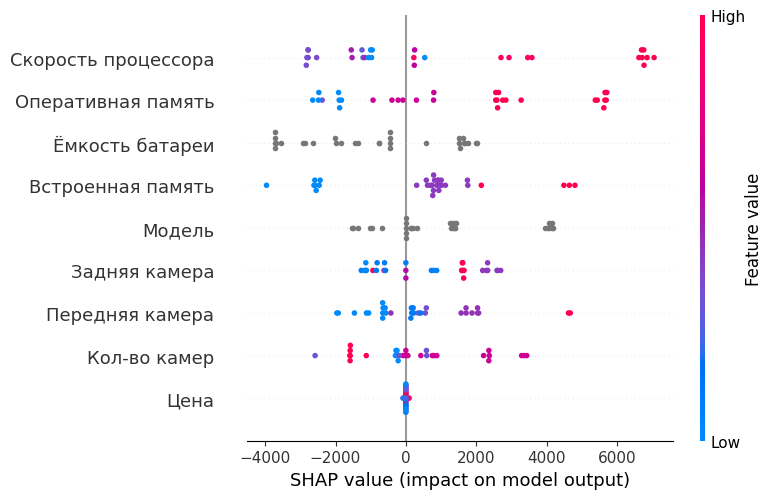

In [ ]:
X_train = train_data
ag_wrapper = AutogluonWrapper(predictor, train_data.columns)
explainer = shap.KernelExplainer(ag_wrapper.predict,train_data)
ROW_INDEX = 0  # index of an example datapoint
NSHAP_SAMPLES = 100  # how many samples to use to approximate each Shapely value, larger values will be slower
N_VAL = 30
single_datapoint = X_train.iloc[[ROW_INDEX]]
single_prediction = ag_wrapper.predict(single_datapoint)

shap_values_single = explainer.shap_values(single_datapoint, nsamples=NSHAP_SAMPLES)
shap.force_plot(explainer.expected_value, shap_values_single, X_train.iloc[ROW_INDEX,:])
shap_values = explainer.shap_values(X_train.iloc[0:N_VAL,:], nsamples=NSHAP_SAMPLES)
shap.summary_plot(shap_values, X_train.iloc[0:N_VAL,:])